In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df=pd.read_csv("diabetes.csv")

## EDA

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dfCopy=df.copy(deep=True)

In [10]:
dfCopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=dfCopy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(dfCopy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [12]:
dfCopy['Glucose'].fillna(dfCopy['Glucose'].mean(), inplace = True)
dfCopy['BloodPressure'].fillna(dfCopy['BloodPressure'].mean(), inplace = True)
dfCopy['SkinThickness'].fillna(dfCopy['SkinThickness'].median(), inplace = True)
dfCopy['Insulin'].fillna(dfCopy['Insulin'].median(), inplace = True)
dfCopy['BMI'].fillna(dfCopy['BMI'].median(), inplace = True)

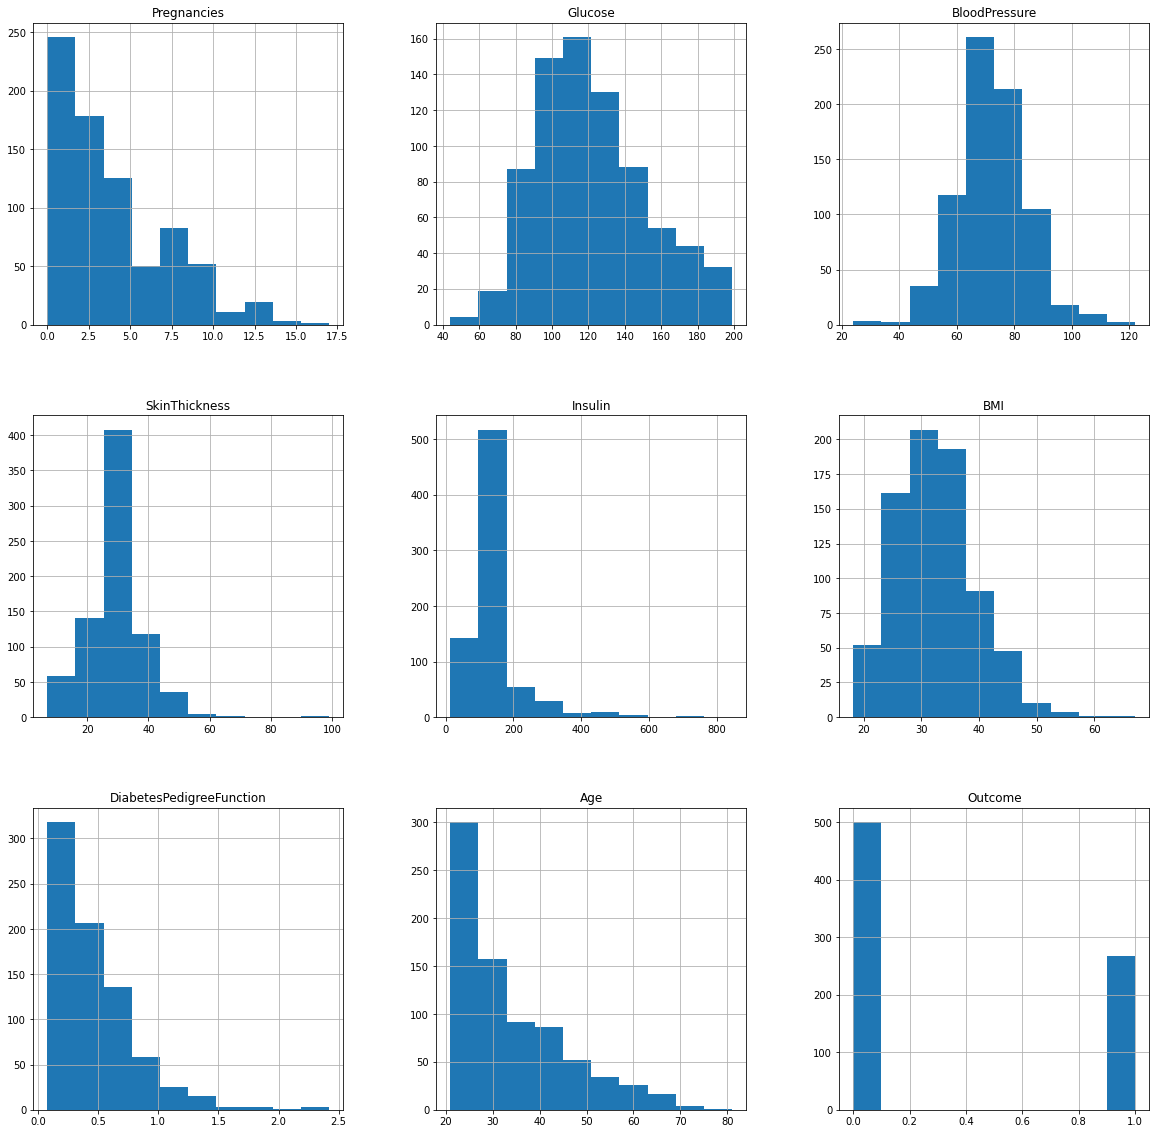

In [19]:
p=dfCopy.hist(figsize=(20,20))

0    500
1    268
Name: Outcome, dtype: int64


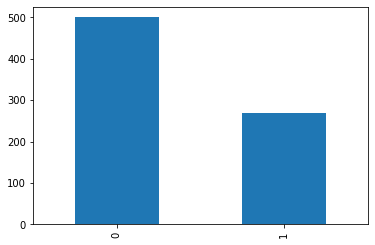

In [21]:
colorWheel={1: "0392cf",
            2: "#7bc043"}
colors=dfCopy['Outcome'].map(lambda x:colorWheel.get(x+1))
print(dfCopy.Outcome.value_counts())
p=dfCopy.Outcome.value_counts().plot(kind="bar")

## Scaling the dataset before applying Machine Learning

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(dfCopy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [29]:
y=dfCopy.Outcome

## Train Test Split and Cross validation

In [ ]:
X_train,X_test,y_train,Y_test=train_test_split(X,y,test_size=1/3, random_state=42, stratify=y)